# Exercise 3. Denoising
## Part B

### Import Liberaries

In [1]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

### Reading Original Images and Showing Them

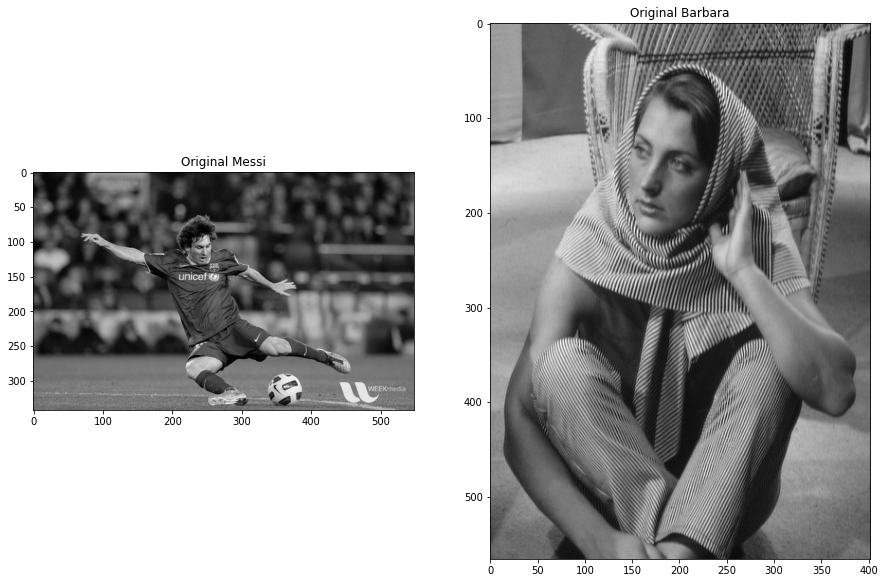

In [2]:
messi = cv2.imread("messi5.jpg", cv2.IMREAD_GRAYSCALE)
barbara = cv2.imread("barbara.tif", cv2.IMREAD_GRAYSCALE)

_, subplt = plt.subplots(1, 2, figsize=(15, 12))
subplt[0].imshow(messi, cmap='gray')
subplt[0].title.set_text("Original Messi")
subplt[1].imshow(barbara, cmap='gray')
subplt[1].title.set_text("Original Barbara")
plt.show()

### Applying Gaussian and Salt & Pepper noise to Images

In [3]:
gaussian_messi = random_noise(messi, mode='gaussian', var=0.1, mean=0)
sp_messi = random_noise(messi, mode='s&p', amount=0.1)
gaussian_barbara = random_noise(barbara, mode='gaussian', var=0.1, mean=0)
sp_barbara = random_noise(barbara, mode='s&p', amount=0.1)

### Showing the Results' Function

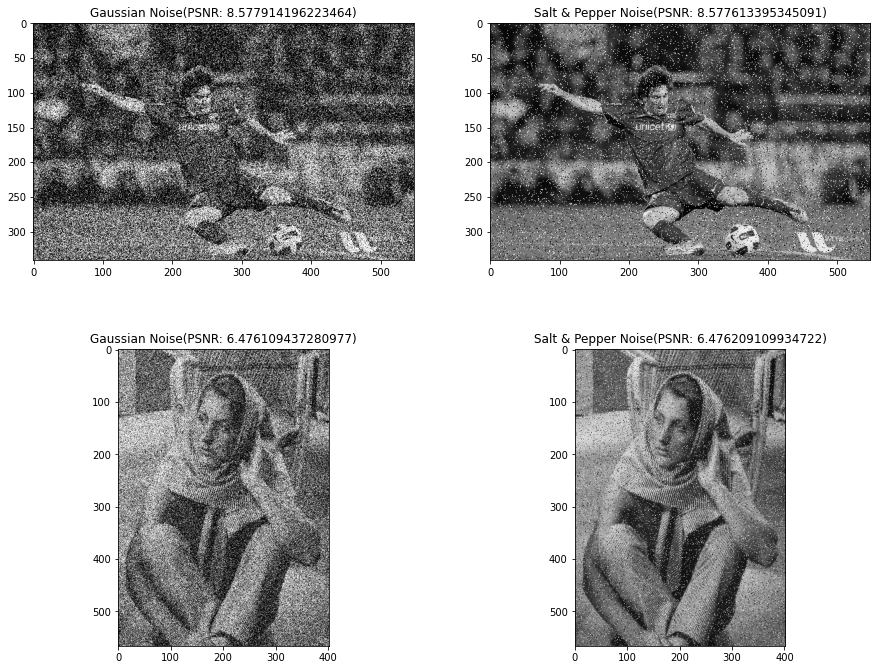

In [4]:
def show_result():
    _, subplt = plt.subplots(2, 2, figsize=(15, 12))
    subplt[0][0].imshow(gaussian_messi, cmap='gray')
    subplt[0][0].title.set_text(f"Gaussian Noise(PSNR: {cv2.PSNR(messi.astype('float64'), gaussian_messi)})")
    subplt[0][1].imshow(sp_messi, cmap='gray')
    subplt[0][1].title.set_text(f"Salt & Pepper Noise(PSNR: {cv2.PSNR(messi.astype('float64'), sp_messi)})")
    subplt[1][0].imshow(gaussian_barbara, cmap='gray')
    subplt[1][0].title.set_text(f"Gaussian Noise(PSNR: {cv2.PSNR(barbara.astype('float64'), gaussian_barbara)})")
    subplt[1][1].imshow(sp_barbara, cmap='gray')
    subplt[1][1].title.set_text(f"Salt & Pepper Noise(PSNR: {cv2.PSNR(barbara.astype('float64'), sp_barbara)})")
    plt.show()


show_result()

### Function for Thresholgin wavelet transform Coefficients

In [5]:
def dwt_noise_filter(src, th):
    cA, (cH, cV, cD) = pywt.dwt2(src, 'haar')
    f = lambda x: x if x >= th else 0
    cH *= cH >= th
    cV *= cV >= th
    cD *= cD >= th
    return pywt.idwt2((cA, (cH, cV, cD)), 'haar')

### Applying DWT Filter and Showing the Results
#### The value of threshold is 0.8 because maximum of the values are near 1 so in this manner we can drop more high frequency components

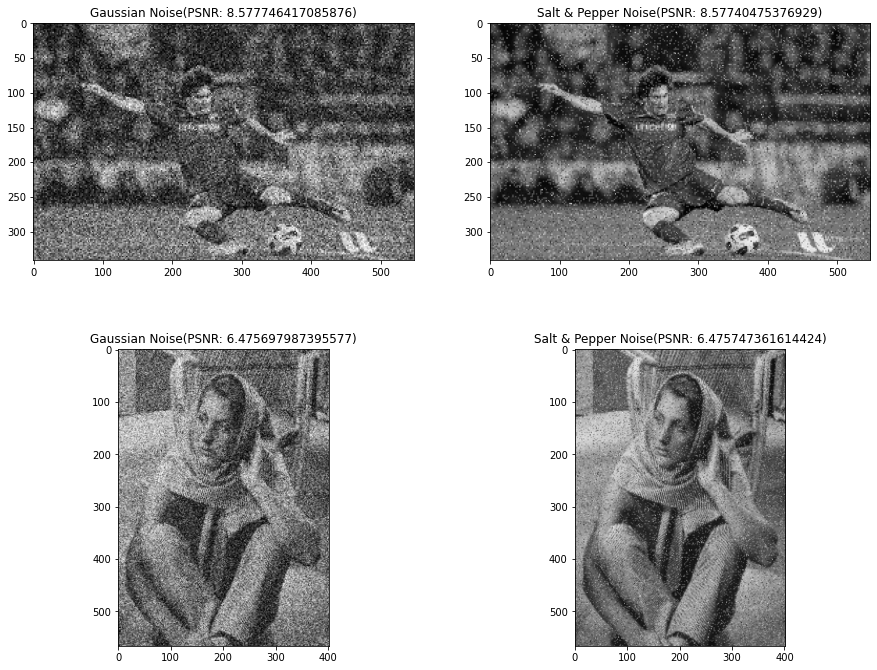

In [6]:
threshold = 0.8
gaussian_messi = dwt_noise_filter(gaussian_messi, threshold)
sp_messi = dwt_noise_filter(sp_messi, threshold)
gaussian_barbara = dwt_noise_filter(gaussian_barbara, threshold)
sp_barbara = dwt_noise_filter(sp_barbara, threshold)

show_result()

#### As we can see the values of PSNRs and human vision system both tell us that this method is not effective enough to filter gaussion and salt & pepper noises.
#### Although the noise droped a little but the quality of the images has been reduced too.
#### We learned that median filter could do better specially in salt & pepper noise